In [36]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col
import statsmodels.formula.api as smf
import datetime
import json
import copy
import json
import pandas as pd
import time
def local_time(timestamp):
    time_local = time.localtime(timestamp/1000)
    dt = time.strftime("%Y-%m-%d %H:%M:%S", time_local)
    return dt

In [2]:
PD = pd.read_json('./ProcessingData_pd.json')

In [102]:
sum([1 for i in PD['topic_num'] if i>=2])/len(PD)

0.6732614956476718

In [4]:
# data = pd.read_csv('1_zhihu_cateroy_spanning_interaction.csv')
# data['topic_num']=PD['topic_num']
# data['topic']=PD['topic']
# data['log_content_distance'] = np.log10([i+0.001 if i<1 else 1 for i in data['content_distance']])
# data['knowledge_granularity'] = data['max_level']
# data['date']=[local_time(a) for a in PD['time']]
# data['content_distance'] = [i if j>0 else 1 for i,j in zip(data['content_distance'],data['topic_num']) ]
# data['content_distance'] = [i if j!=1 else 0 for i,j in zip(data['content_distance'],data['topic_num']) ]
# data['content_distance'] = [i if i<1 else 1 for i,j in zip(data['content_distance'],data['topic_num']) ]
# data['content_distance2'] = data['content_distance']**2
# data['content_distance_by_max_level'] = data['content_distance']*data['max_level']
# data['content_distance2_by_max_level'] = data['content_distance2']*data['max_level']
# data.to_csv('1_zhihu_cateroy_spanning_interaction.csv')

In [2]:
data = pd.read_csv('1_zhihu_cateroy_spanning_interaction.csv')

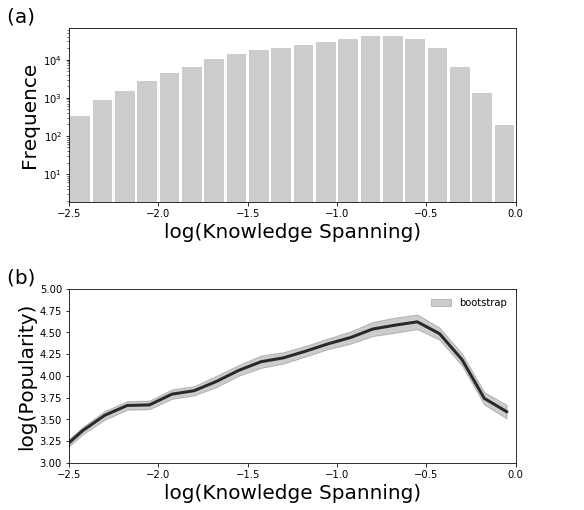

In [305]:
tmp = {}
m=8
dt = data[data['topic_num']>1]
for i,j in zip(dt['log_content_distance'],dt['log_follower_num']):
    s = int(i*m)/m
    if s not in tmp:
        tmp[s]=[]
    tmp[s].append(j)
x = np.array(sorted(tmp.keys()))
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(211)
plt.title('(a)'+' '*85,fontsize=20)
a,b=np.histogram(list(dt['log_content_distance']),bins=np.linspace(-3,0,25))
ax.bar((b[1:]+b[:-1])/2,a,width=0.11,alpha=0.4,zorder=0,color='gray')
ax.set_yscale('log')
plt.ylabel('Frequence',fontsize=20)
plt.xlabel('log(Knowledge Spanning)',fontsize=20)
plt.xlim(-2.5,0)

ax = fig.add_subplot(212)
y = np.array([np.mean(tmp[i]) for i in x])
ye=[]
for i in x:
    s=[]
    for _ in range(40):
        a = np.mean(np.random.choice(tmp[i],size=1000))
        s.append(a)
    ye.append(np.std(s))
ye=np.array(ye)
plt.title('(b)'+' '*85,fontsize=20)
plt.plot(x[2:]-.05,y[2:],lw=3,c='k',alpha=.8)
plt.fill_between(x-.05,y-ye,y+ye,color='k',alpha=.2,label='bootstrap')
plt.ylim(3,5)
plt.xlim(-2.5,0)
plt.legend(frameon=False)
plt.xlabel('log(Knowledge Spanning)',fontsize=20)
plt.ylabel('log(Popularity)',fontsize=20)
fig.subplots_adjust(hspace=0.5)

2011
2014
2017


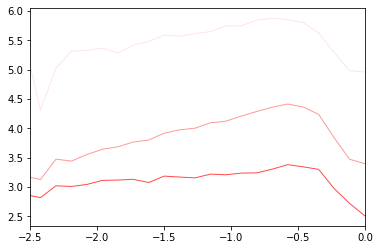

In [253]:
data['year']= [int(i.split(' ')[0].split('-')[0]) for i in data['date']]
for k in range(2011,2019,3):
    tmp = {}
    m=26/3
    print(k)
    dt = data[(data['topic_num']>1) & (data['year']>=k)&(data['year']<=k+4)]
    for i,j in zip(dt['log_content_distance'],dt['log_follower_num']):
        s = int(i*m)/m
        if s not in tmp:
            tmp[s]=[]
        tmp[s].append(j)
    x = np.array(sorted(tmp.keys()))

    y = np.array([np.mean(tmp[i]) for i in x])
    ye = np.array([np.std(tmp[i]) for i in x])
    plt.plot(x[2:],y[2:],lw=1,c='r',alpha=(k-2010)/10)
    plt.xlim(-2.5,0)

In [13]:
from statsmodels.iolib.summary2 import summary_col
import statsmodels.formula.api as smf

In [21]:
lm1 = smf.ols(formula="log_follower_num ~ log_content_distance + I(log_content_distance**2)", data=data, missing='drop').fit()

In [48]:
data['year']=[int(i.split(' ')[0].split('-')[0]) for i in data['date']]

In [58]:
a,b = np.histogram(np.log10(data[(data['topic_num']>0) & (data['year']==y)]['content_distance']+0.001),bins=50)
    

In [117]:
data['year1']=[int(y/2)*2 for y in data['year']]

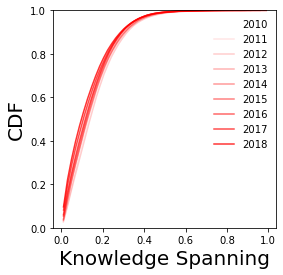

In [142]:
plt.figure(figsize=(4,4))
for y in range(2010,2019):
    a,b = np.histogram(data[(data['topic_num']>1) & (data['year']==y)]['content_distance'],bins=50)
    plt.plot((b[:-1]+b[1:])/2,np.cumsum(a)/sum(a),label=str(y),c='red',alpha=(y-2010)/10)
#plt.xlim(0,.4)
plt.ylim(0,1)
plt.xlabel('Knowledge Spanning',fontsize=20)
plt.ylabel('CDF',fontsize=20)
plt.legend(frameon=False)

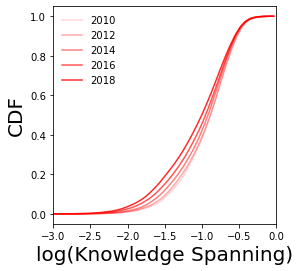

In [144]:
plt.figure(figsize=(4,4))
for y in range(2010,2019,2):
    a,b = np.histogram(np.log10(data[(data['topic_num']>1) & (data['year1']==y)]['content_distance']),bins=50)
    plt.plot((b[:-1]+b[1:])/2,np.cumsum(a)/sum(a),label=str(y),c='red',alpha=(y-2008)/12)
#plt.ylim(0,.1)
plt.xlim(-3,0)
plt.xlabel('log(Knowledge Spanning)',fontsize=20)
plt.ylabel('CDF',fontsize=20)
plt.legend(frameon=False)

In [51]:
import copy
data1 = copy.deepcopy(data[data['topic_num']>0])
data1['log_content_distance'] = np.log10(data1['content_distance']+0.001)
data1['log_content_distance2'] = data1['log_content_distance']**2
data1['log_content_distance_by_max_level'] = data1['log_content_distance2']*data1['max_level']
data1['log_content_distance2_by_max_level'] = data1['log_content_distance2']*data1['max_level']

In [52]:
data1.to_csv('zhihu_cateroy_spanning_interaction_2.csv')

In [61]:
data.describe()

,title_length,log_lasting_days,max_level,content_distance,content_distance2,content_distance_by_max_level,content_distance2_by_max_level,Mon,Tue,Wed,...,H_0_3,H_3_6,H_6_9,H_9_12,H_12_15,H_15_18,H_18_21,log_follower_num,topic_num,knowledge_granularity
count,463545.000000,463545.000000,463545.000000,463545.000000,463545.000000,463545.000000,463545.000000,463545.000000,463545.000000,463545.000000,...,463545.000000,463545.000000,463545.000000,463545.000000,463545.000000,463545.000000,463545.000000,463545.000000,463545.000000,463545.000000
mean,21.583747,4.940528,4.710675,0.225529,0.150369,0.550091,0.128008,0.146186,0.149608,0.151433,...,0.078717,0.017724,0.053186,0.170652,0.163697,0.177750,0.154928,3.728876,2.697550,4.710675
std,10.207082,2.071172,2.463255,0.315445,0.327618,0.673101,0.263431,0.353293,0.356687,0.358471,...,0.269297,0.131948,0.224404,0.376205,0.370001,0.382302,0.361836,2.229996,1.757045,2.463255
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,3.218876,4.000000,0.020751,0.000431,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.945910,1.000000,4.000000
50%,19.000000,5.267858,5.000000,0.104981,0.011021,0.308572,0.017300,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.091042,3.000000,5.000000
75%,26.000000,6.902743,6.000000,0.243866,0.059470,0.881049,0.142100,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.288267,4.000000,6.000000
max,125.000000,7.901377,14.000000,1.000000,1.000000,9.233781,7.751155,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.021608,16.000000,14.000000


In [8]:
tmp=[]
for top in data['topic']:
    tmp+=top

In [109]:
top = ['生活',
 '历史',
 '电影',
 '心理学',
 '恋爱',
 '教育',
 '音乐',
 '大学',
 '社会',
 '心理',
 '医学',
 '法律',
 '文学',
 '互联网',
 '健康',
 '健身',
 '留学']

fanyi=['life',
'history',
'movie ',
'psychology',
'love',
'education',
'University',
'society ',
'psychology',
'medicine ',
'law',
'literature',
'Internet',
'health',
'Fitness',
'Study abroad ']

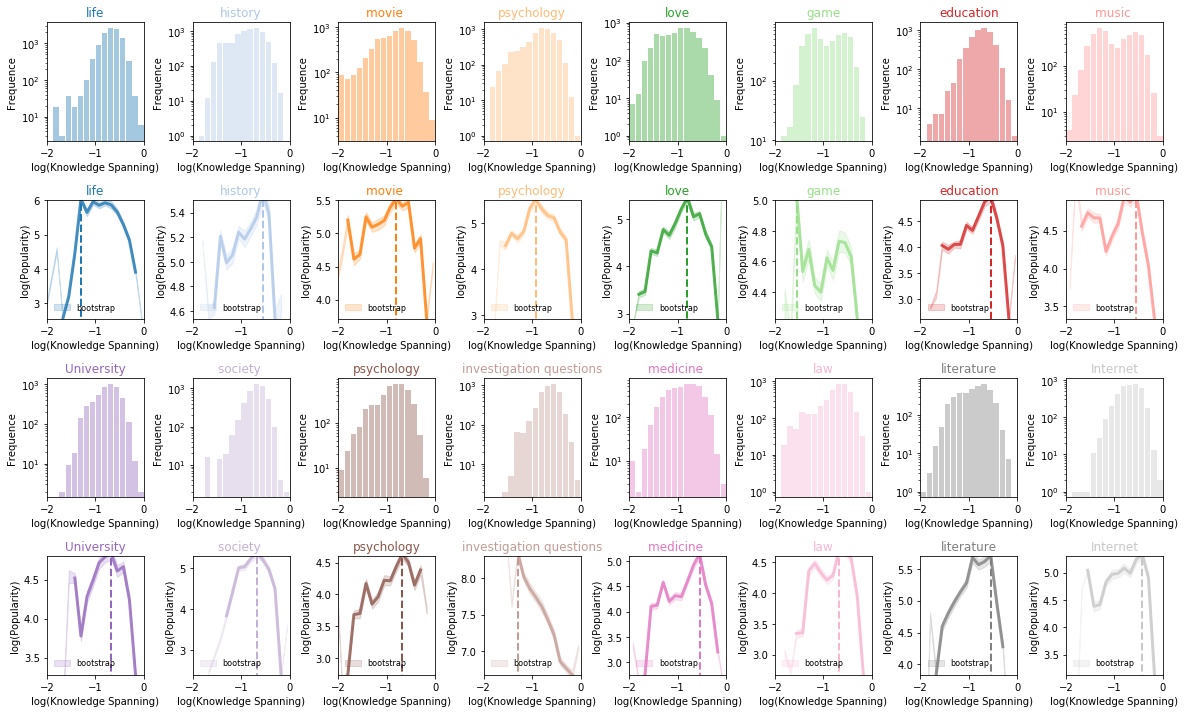

In [66]:
c = plt.cm.tab20.colors
fig=plt.figure(figsize=(20,12))
for ri in range(16):
    t=top[ri]
    ft=fanyi[ri]
    l = 1 if ri>=8 else 0
    ax = fig.add_subplot(4,8,ri+1+l*8)
    tmp = {}
    m=8
    dt1= copy.deepcopy(data)
    dt1[t]=[1 if t in i else 0 for i in data['topic']]
    dt = dt1[(dt1['topic_num']>1) &(dt1[t]==1)]
    for i,j in zip(dt['log_content_distance'],dt['log_follower_num']):
        s = int(i*m)/m
        if s not in tmp:
            tmp[s]=[]
        tmp[s].append(j)
        
    x = np.array(sorted(tmp.keys()))
    a,b=np.histogram(list(dt['log_content_distance']),bins=np.linspace(-3,0,25))
    ax.bar((b[1:]+b[:-1])/2,a,width=0.11,alpha=0.4,zorder=0,color=c[ri])
    ax.set_yscale('log')
    ax.set_xlim(-2,0)
    plt.ylabel('Frequence',fontsize=10)
    plt.xlabel('log(Knowledge Spanning)',fontsize=10)
    ax.set_title(ft,color=c[ri])
    ax1 = fig.add_subplot(4,8,ri+1+8+l*8)
    y = np.array([np.mean(tmp[i]) for i in x])
    ye=[]
    for i in x:
        s=[]
        for _ in range(40):
            a = np.mean(np.random.choice(tmp[i],size=1000))
            s.append(a)
        ye.append(np.std(s))
    ye=np.array(ye)
    ax1.plot(x[2:-1]-.05,y[2:-1],lw=3,c=c[ri],alpha=.8)
    ax1.fill_between(x-.05,y-ye,y+ye,color=c[ri],alpha=.2,label='bootstrap')
    ss = sorted(list(zip(x[2:-1]-.05,y[2:-1])),key=lambda x:x[1],reverse=True)
    ymax = int(max(y[2:-1])*10)/10
    plt.plot([ss[0][0],ss[0][0]],[2,ss[0][1]],'--',c=c[ri],lw=2,)
    ax1.set_ylim(min(y[2:-1]),ymax)
    ax1.set_xlim(-2,0)
    plt.legend(frameon=False,loc=3,fontsize=8)
    ax1.set_ylabel('log(Popularity)',fontsize=10)
    ax1.set_xlabel('log(Knowledge Spanning)',fontsize=10)
    ax1.set_title(ft,color=c[ri])

fig.subplots_adjust(hspace=0.5,wspace=0.5) 
plt.savefig('./zhihu_top_sub.pdf', bbox_inches ='tight')

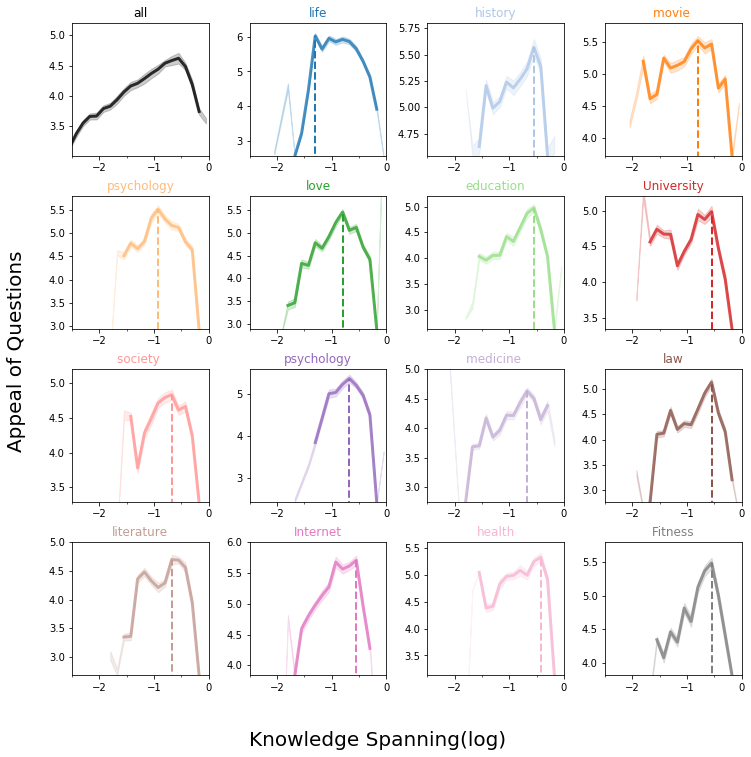

In [110]:
c = plt.cm.tab20.colors
fig=plt.figure(figsize=(12,12),)
ax1 = fig.add_subplot(4,4,1)
tmp = {}
m=8
dt = data[data['topic_num']>1]
for i,j in zip(dt['log_content_distance'],dt['log_follower_num']):
    s = int(i*m)/m
    if s not in tmp:
        tmp[s]=[]
    tmp[s].append(j)
x = np.array(sorted(tmp.keys()))
y = np.array([np.mean(tmp[i]) for i in x])
ye=[]
for i in x:
    s=[]
    for _ in range(40):
        a = np.mean(np.random.choice(tmp[i],size=1000))
        s.append(a)
    ye.append(np.std(s))
ye=np.array(ye)
ax1.plot(x[2:-1]-.05,y[2:-1],lw=3,c='k',alpha=.8)
ax1.fill_between(x-.05,y-ye,y+ye,color='k',alpha=.2,label='bootstrap')
ax1.set_title('all',color='k')
ax1.set_xlim(-2.5,0)
ax1.xaxis.set_minor_locator(plt.MultipleLocator(.5))
for ri in range(15):
    t=top[ri]
    ft=fanyi[ri]
    l = 1 if ri>=8 else 0
    tmp = {}
    m=8
    dt1= copy.deepcopy(data)
    dt1[t]=[1 if t in i else 0 for i in data['topic']]
    dt = dt1[(dt1['topic_num']>1) &(dt1[t]==1)]
    for i,j in zip(dt['log_content_distance'],dt['log_follower_num']):
        s = int(i*m)/m
        if s not in tmp:
            tmp[s]=[]
        tmp[s].append(j)
        
    x = np.array(sorted(tmp.keys()))
    ax1 = fig.add_subplot(4,4,ri+2)
    y = np.array([np.mean(tmp[i]) for i in x])
    ye=[]
    for i in x:
        s=[]
        for _ in range(40):
            a = np.mean(np.random.choice(tmp[i],size=1000))
            s.append(a)
        ye.append(np.std(s))
    ye=np.array(ye)
    ax1.plot(x[2:-1]-.05,y[2:-1],lw=3,c=c[ri],alpha=.8)
    ax1.fill_between(x-.05,y-ye,y+ye,color=c[ri],alpha=.2,label='bootstrap')
    ss = sorted(list(zip(x[2:-1]-.05,y[2:-1])),key=lambda x:x[1],reverse=True)
    ymax = int(max(y[2:-1])*5+2)/5
    plt.plot([ss[0][0],ss[0][0]],[2,ss[0][1]],'--',c=c[ri],lw=2,)
    ax1.set_ylim(min(y[2:-1]),ymax)
    ax1.set_xlim(-2.5,0)
    #plt.legend(frameon=False,loc=3,fontsize=8)
#     ax1.set_ylabel('Appeal of Questions',fontsize=10)
#     ax1.set_xlabel('Knowledge Spanning(log)',fontsize=10)
    ax1.set_title(ft,color=c[ri])
    ax1.xaxis.set_minor_locator(plt.MultipleLocator(.5))
    
fig.text(0.33, 0.05, 'Knowledge Spanning(log)', va='center',fontsize=20)
fig.text(0.05, 0.5, 'Appeal of Questions', va='center', rotation='vertical',fontsize=20)

fig.subplots_adjust(hspace=0.3,wspace=0.3) 
plt.savefig('./zhihu_top_sub.pdf', bbox_inches ='tight')